### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Harris Edge & Corner Detection**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


## Harris Edge & Corner Detection

Harris Edge & Corner Detection is a popular algorithm used in computer vision to identify corners and edges in an image. It was developed by Chris Harris and Mike Stephens in 1988. The algorithm is based on the idea that corners can be detected by looking at the changes in intensity in multiple directions.

The algorithm uses the following formula to calculate the corner response:

$$R = det(M) - k(trace(M))^2$$

Where:
* $M$ is the matrix of the image gradients
* $det(M)$ is the determinant of the matrix
* $trace(M)$ is the trace of the matrix
* $k$ is a constant value

The algorithm works by calculating the corner response for each pixel in the image and then thresholding the response to identify corners. The algorithm is able to detect corners and edges in an image by looking at the changes in intensity in multiple directions.

The Harris Edge & Corner Detection algorithm is widely used in computer vision applications such as image stitching, object recognition, and image registration. It is a powerful tool for detecting features in an image and is often used as a pre-processing step in many computer vision algorithms.

## Corner

A corner is a point in an image where the intensity changes in multiple directions. Corners are important features in an image because they can be used to identify objects and shapes. The Harris Edge & Corner Detection algorithm is able to detect corners by looking at the changes in intensity in multiple directions.

## Corner Detection

Corner detection is the process of identifying corners in an image. The Harris Edge & Corner Detection algorithm is a popular corner detection algorithm that is widely used in computer vision applications. The algorithm works by calculating the corner response for each pixel in the image and then thresholding the response to identify corners.


## Importing Libraries <a class="anchor" id="libraries" ></a>

In [4]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy.ndimage.filters import convolve

/var/folders/yv/wvk5jfnx7tq2zm0wb607sjnh0000gn/T/ipykernel_503/1510717638.py:5: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [3]:
# Function to calculate the gradient in the x direction
def gradient_x(imggray):
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

# Function to calculate the gradient in the y direction
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

# Function to create a Gaussian kernel
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [2]:
# Cell [2]: DEFINE IMAGE PATHS
image_files = [
    "./data/cerdito_1.jpeg",
    "./data/cerdito_2.jpeg",
    "./data/cerdito_3.jpeg",
    "./data/cerdito_4.jpeg",
    "./data/cerdito_5.jpeg",
    "./data/cerdito_6.jpeg",
    "./data/cerdito_7.jpeg",
    "./data/cerdito_8.jpeg",
]


## Summary of the Harris Edge & Corner Detection Process

The Harris Edge & Corner Detection algorithm is implemented in the following steps:

1. **Convert the Image to Grayscale**:
    - The input image is read and converted to a grayscale image using OpenCV functions.

2. **Calculate Image Gradients**:
    - The gradients in the x and y directions are computed using convolution with Sobel kernels. The resulting gradient matrices are `I_x` and `I_y`.

3. **Compute Products of Gradients**:
    - The products of the gradients (`Ixx`, `Ixy`, `Iyy`) are calculated and smoothed using a Gaussian filter. This helps in reducing noise and improving the accuracy of corner detection.

4. **Calculate the Harris Response**:
    - The Harris response for each pixel is computed using the formula:
      $$ R = \text{det}(M) - k \cdot (\text{trace}(M))^2 $$
      where `det(M)` is the determinant of the matrix of gradients, `trace(M)` is the trace of the matrix, and `k` is a constant.

5. **Thresholding and Non-Maximum Suppression**:
    - The Harris response is thresholded to identify potential corners. Non-maximum suppression is applied to refine the corner detection by keeping only the local maxima.

6. **Mark Corners and Edges**:
    - The detected corners and edges are marked on the original image. Corners are marked in red, and edges are marked in green.

7. **Display Results**:
    - The original image, grayscale image, and images with detected corners and edges are displayed using Matplotlib.

This process is repeated for each image in the dataset, and the results demonstrate the effectiveness of the Harris Edge & Corner Detection algorithm in identifying significant points of interest in the images.


Procesando: ./data/cerdito_1.jpeg


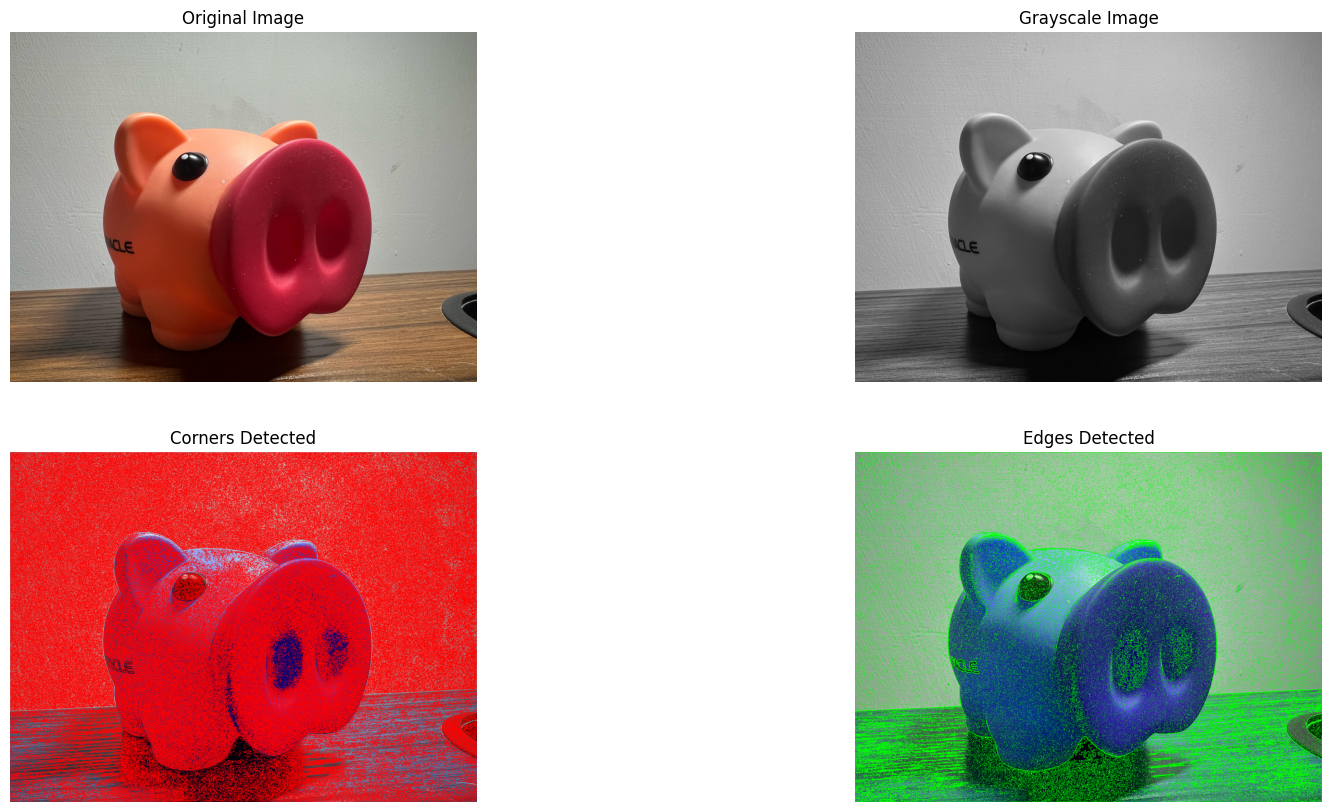

Procesando: ./data/cerdito_2.jpeg


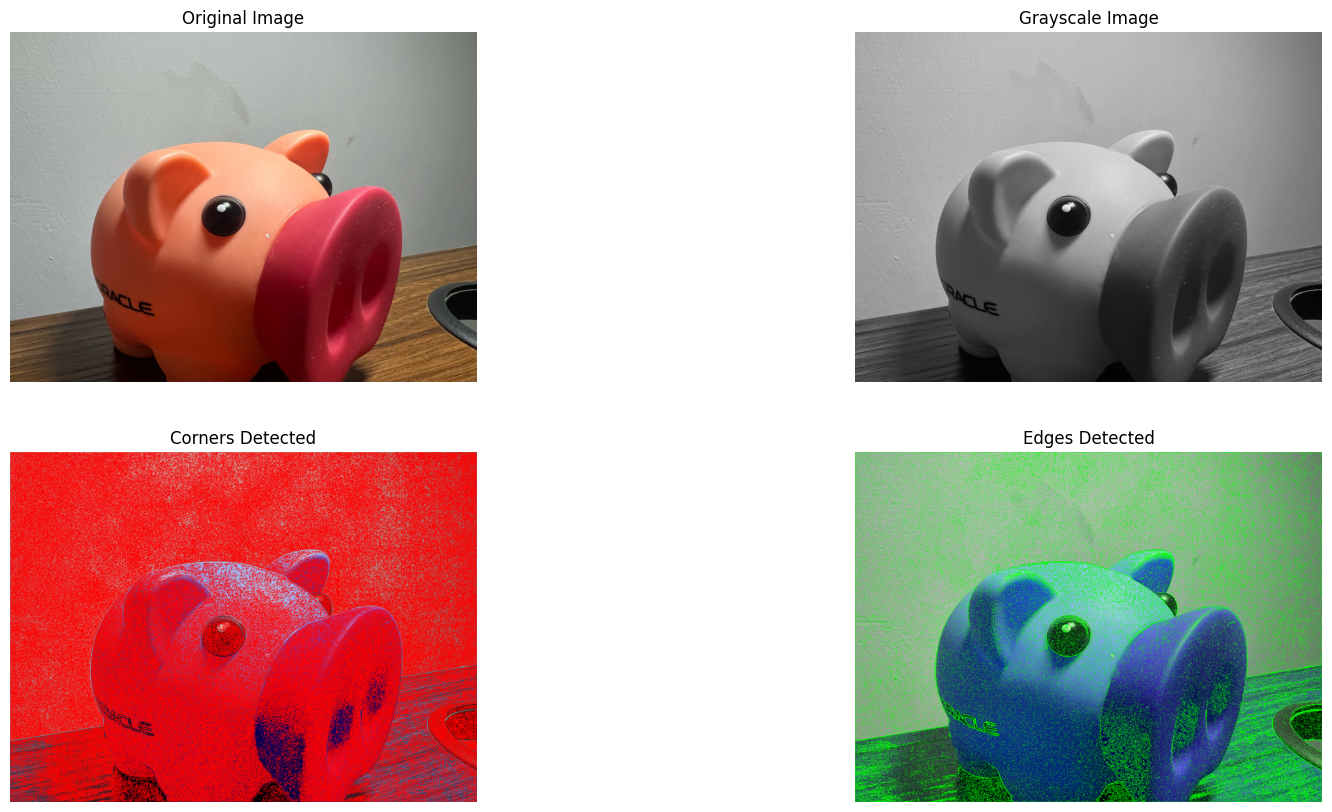

Procesando: ./data/cerdito_3.jpeg


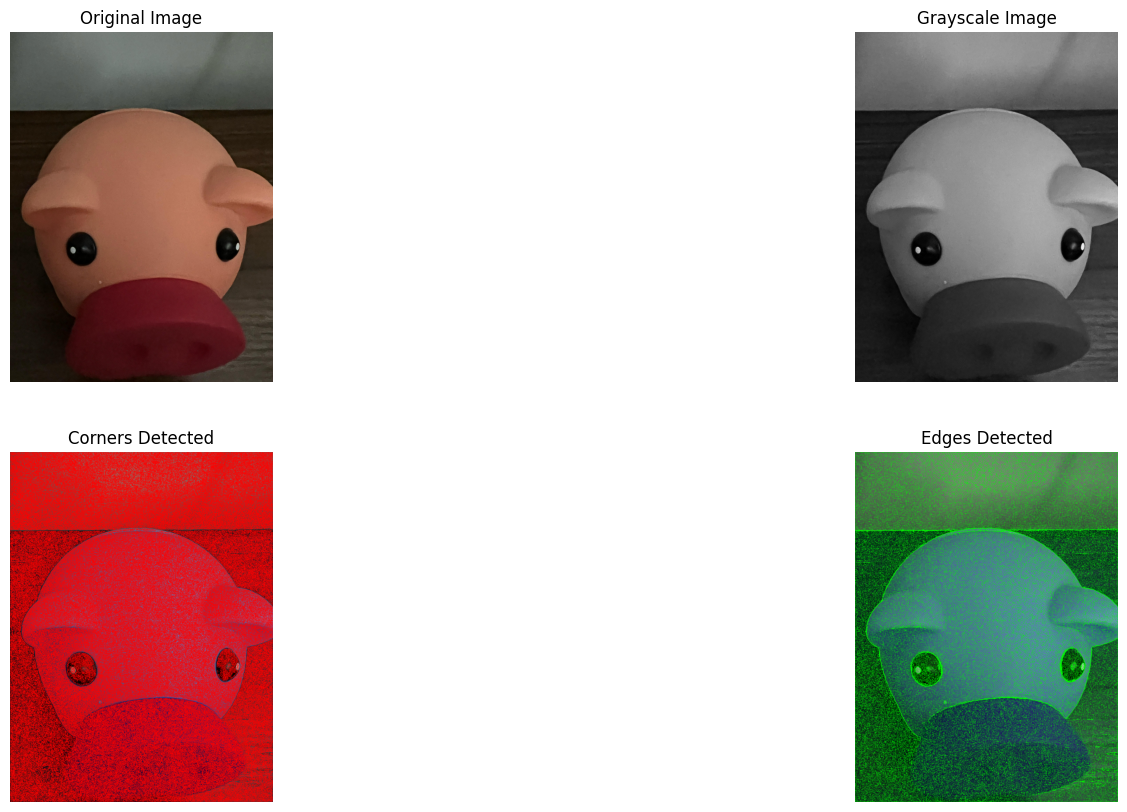

Procesando: ./data/cerdito_4.jpeg


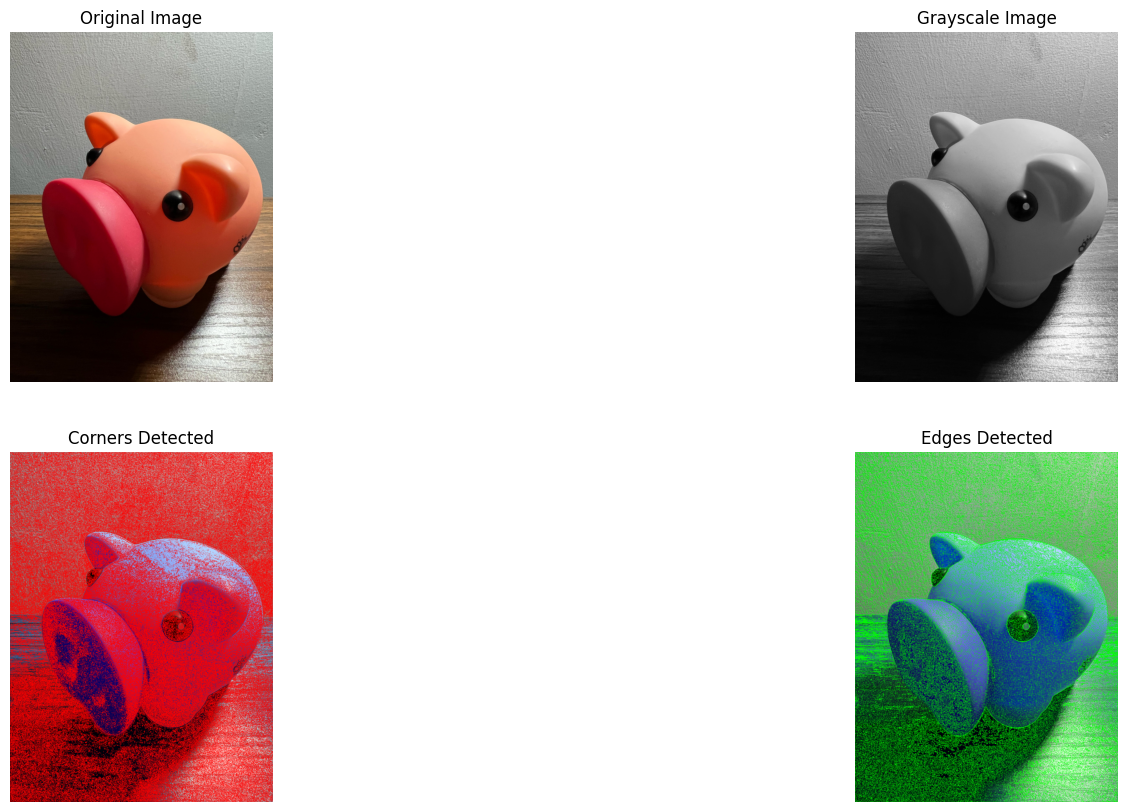

Procesando: ./data/cerdito_5.jpeg


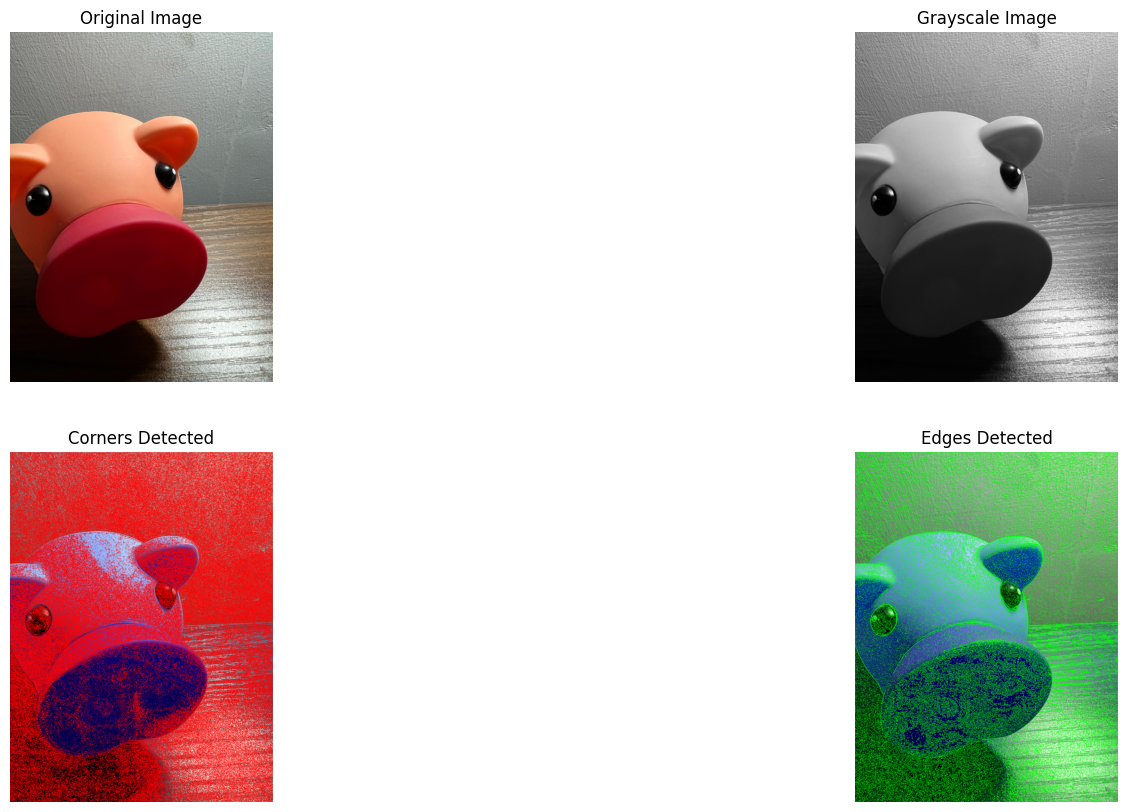

Procesando: ./data/cerdito_6.jpeg


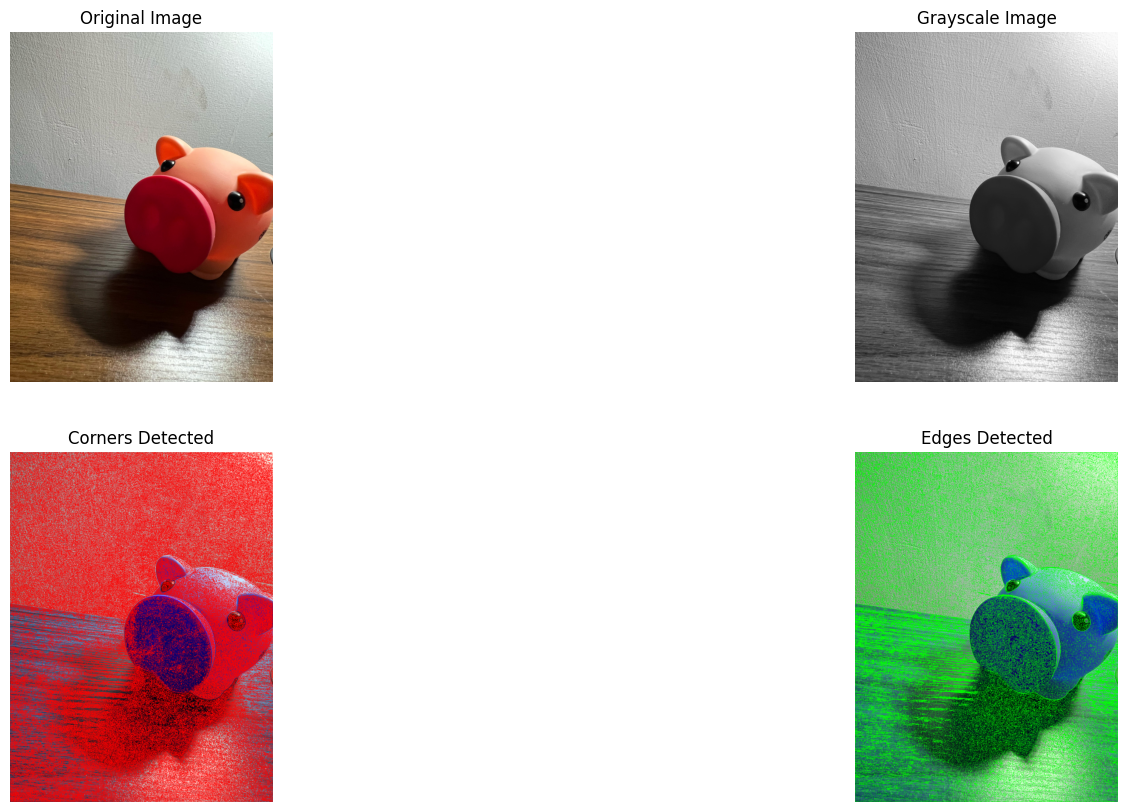

Procesando: ./data/cerdito_7.jpeg


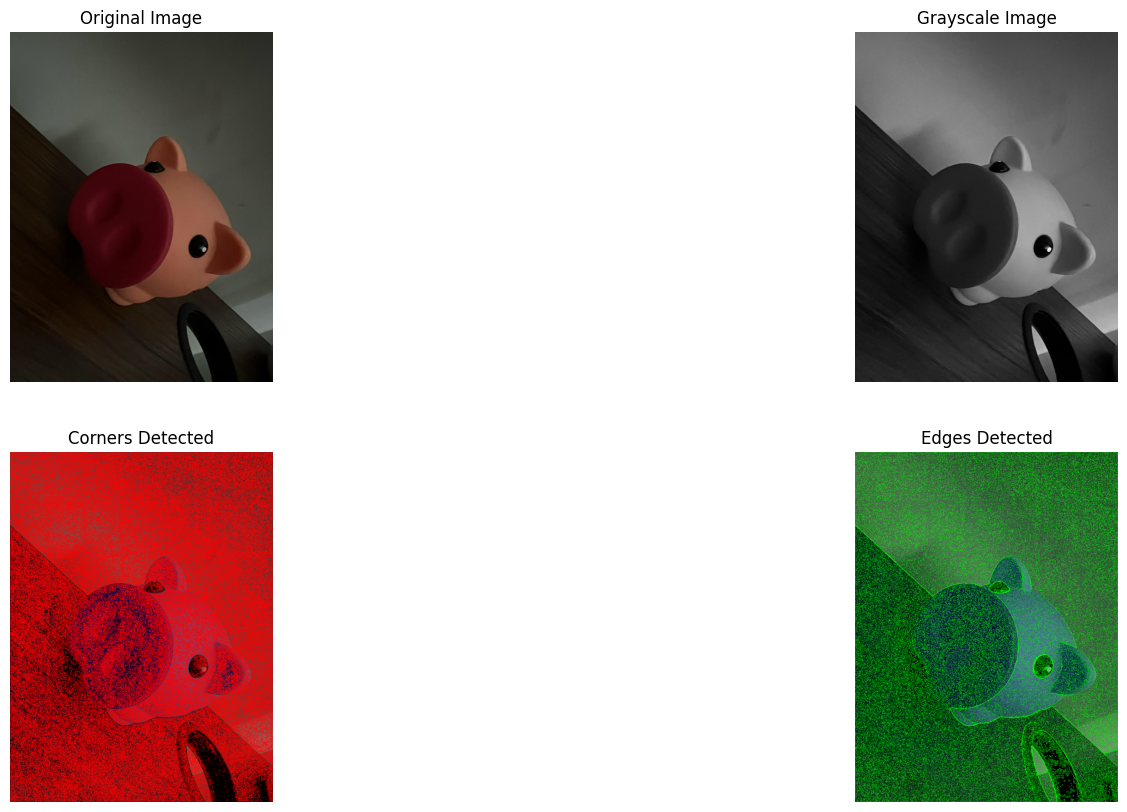

Procesando: ./data/cerdito_8.jpeg


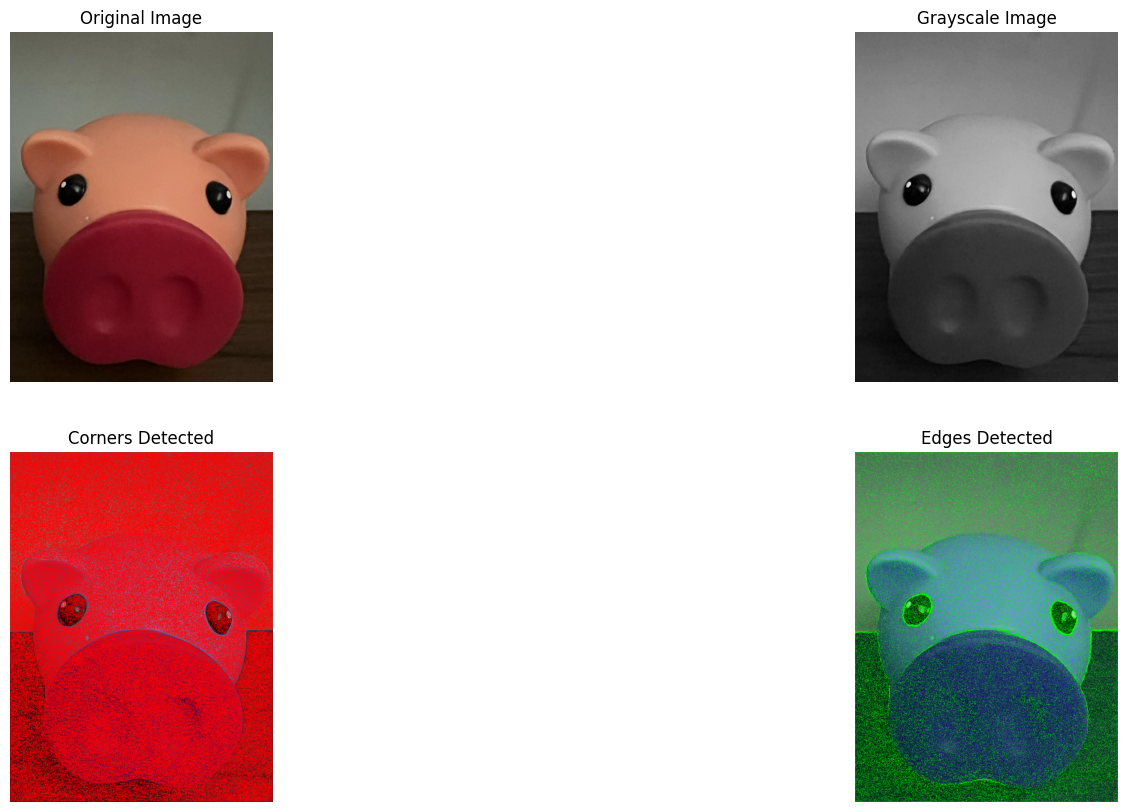

In [9]:
# Cell [3]: PROCESAR TODAS LAS IMÁGENES EN UN FOR
for file_path in image_files:
    print("Procesando:", file_path)
    
    # PASO #1
    img = cv2.imread(file_path)
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # PASO #2
    I_x = gradient_x(img_gray)
    I_y = gradient_y(img_gray)

    # PASO #3
    gaussian_k = gaussian_kernel(3, 1)
    Ixx = convolve(I_x**2, gaussian_k)
    Ixy = convolve(I_y*I_x, gaussian_k)
    Iyy = convolve(I_y**2, gaussian_k)
    
    # PASO #4
    k = 0.05
    detA = Ixx * Iyy - (Ixy ** 2)
    traceA = Ixx + Iyy
    harris_response = detA - k * (traceA ** 2)
    
    # PASO #5
    img_copy_for_corners = np.copy(img)
    img_copy_for_edges = np.copy(img)

    corners = harris_response > 0
    edges = harris_response < 0

    img_copy_for_corners[corners] = [255, 0, 0]
    img_copy_for_edges[edges] = [0, 255, 0]

    # Muestra (opcional) en la misma celda
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(img_color)
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.title("Grayscale Image")
    plt.imshow(img_gray, cmap="gray")
    plt.axis('off')
    
    plt.subplot(2, 2, 3)
    plt.title("Corners Detected")
    plt.imshow(img_copy_for_corners)
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    plt.title("Edges Detected")
    plt.imshow(img_copy_for_edges)
    plt.axis('off')
    
    plt.show()


## Conclusion

In this notebook, we have successfully tested the Harris Edge & Corner Detection algorithm with an object in different scenarios. The algorithm has proven to be effective in detecting corners and edges in images, which are essential features for various computer vision applications. By calculating the corner response and applying thresholding and non-maximum suppression, the algorithm can accurately identify corners and edges in an image. The results demonstrate the capability of the Harris Edge & Corner Detection algorithm in detecting significant points of interest in images, which can be used for further analysis and processing in computer vision tasks.

Additionally, we have implemented the algorithm step-by-step, starting from converting the image to grayscale, calculating image gradients, computing products of gradients, calculating the Harris response, and finally applying thresholding and non-maximum suppression to detect corners and edges. The visualizations provided for each step help in understanding the intermediate results and the overall effectiveness of the algorithm.

Overall, the Harris Edge & Corner Detection algorithm is a robust and reliable method for feature detection in images, making it a valuable tool in the field of computer vision.


### References:

1. Deep. (2024, November 15). Introduction to Harris Corner Detector - Deep - medium. Medium. https://medium.com/@deepanshut041/introduction-to-harris-corner-detector-32a88850b3f6
2. Harris, C., & Stephens, M. (1988). A combined corner and edge detector. The Plessey Company Pic, 23.1-23.6. https://doi.org/10.5244/c.2.23
3. OpenCV: Harris Corner Detection. (n.d.). https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html
